In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
df=pd.read_csv('all_comdty.csv',encoding='gbk')

In [95]:
df=df.dropna(axis=1,how='all')

In [96]:
org_df=pd.DataFrame(columns=['update_date','close','pct_chg','kind'])
for i in range(0,df.shape[1],3):
    tmp=df.iloc[:,i:i+3]
    t=tmp.iloc[4:,:]
    kind=tmp.iloc[0,1]
    t=t.as_matrix()
    df_t=pd.DataFrame(t,columns=['update_date','close','pct_chg'])
    df_t['kind']=kind
    org_df=org_df.append(df_t)
org_df['update_date']=pd.to_datetime(org_df['update_date'])
org_df['pct_chg']=org_df['pct_chg'].astype(float)

In [97]:
org_df['time_tag']=org_df['update_date'].apply(lambda x:str(x.year)+'-'+str(x.month)+'-01' if len(str(x.month))==2 else 
                                                                                        str(x.year)+'-0'+str(x.month)+'-01')

In [98]:
summed_df=pd.DataFrame(org_df.groupby(['kind','time_tag']).pct_chg.mean())

In [99]:
summed_df.reset_index(inplace=True)

/Users/liyuefan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


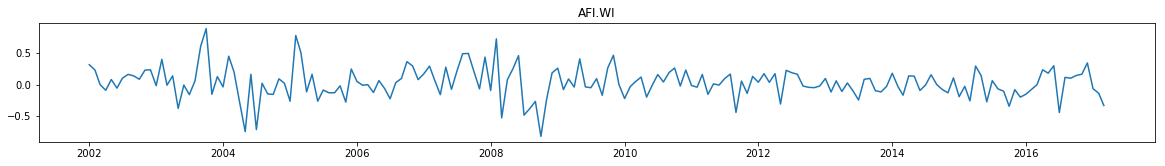

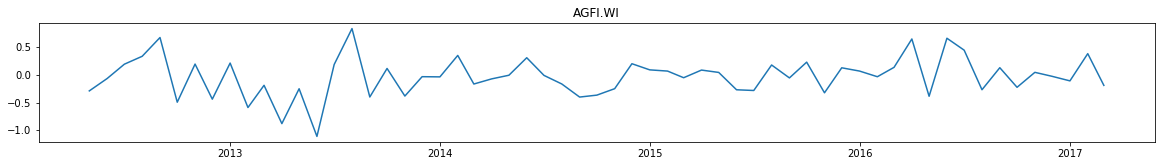

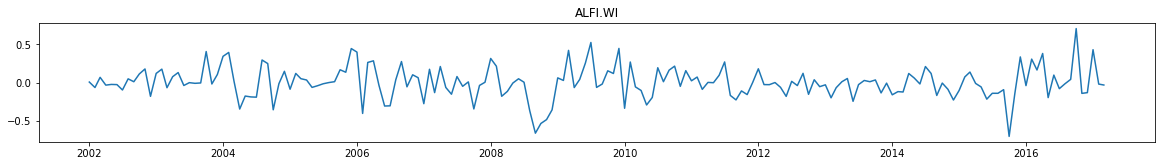

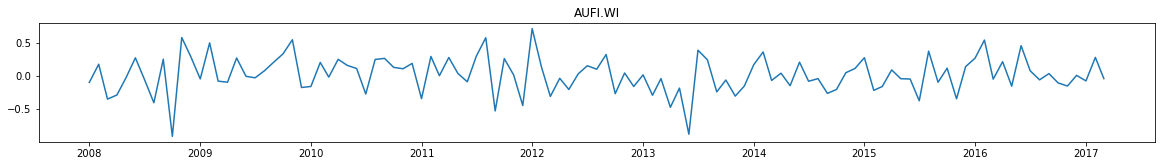

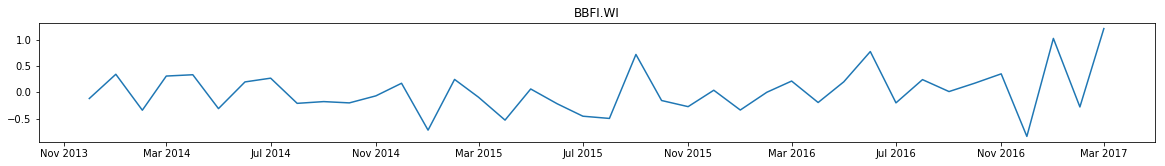

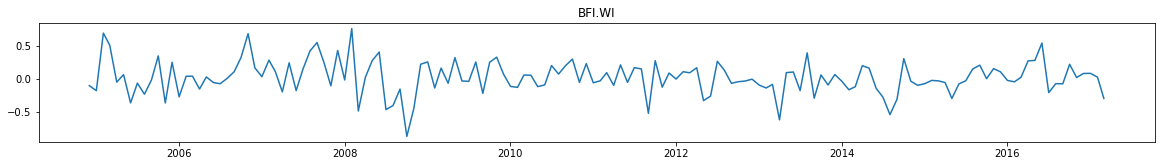

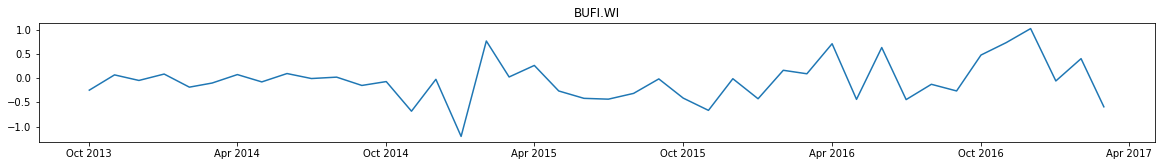

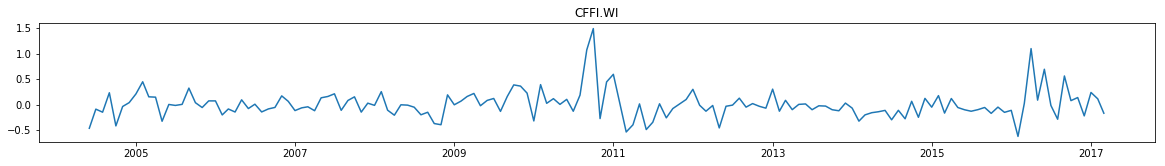

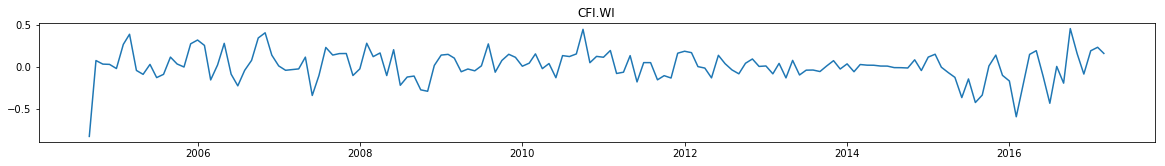

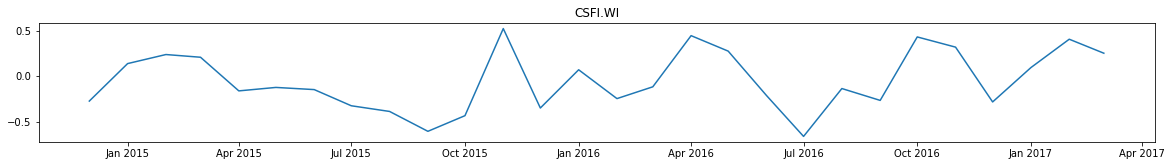

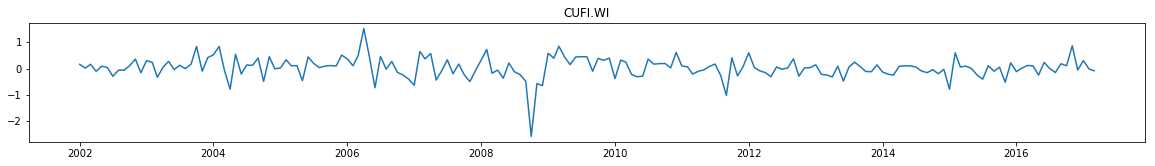

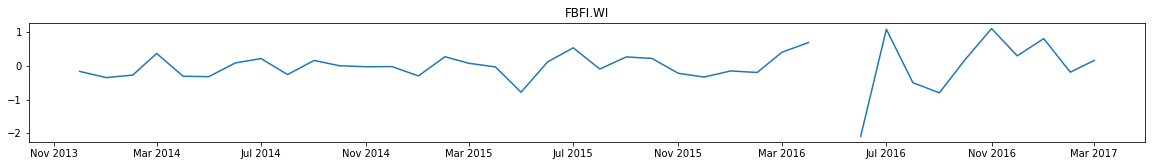

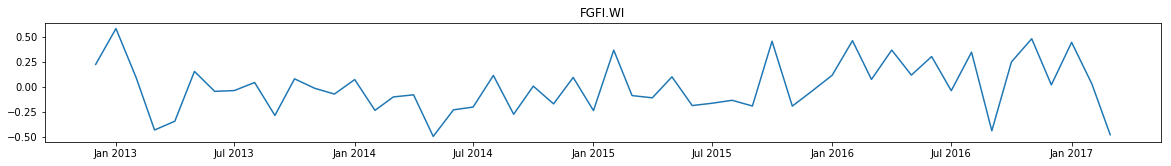

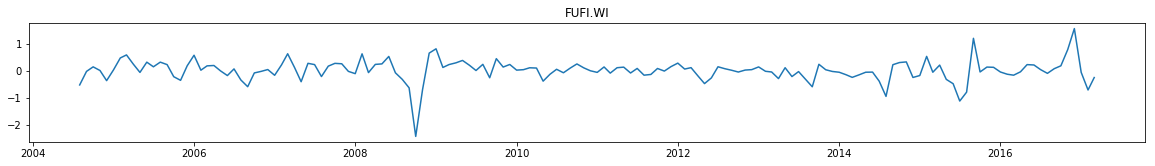

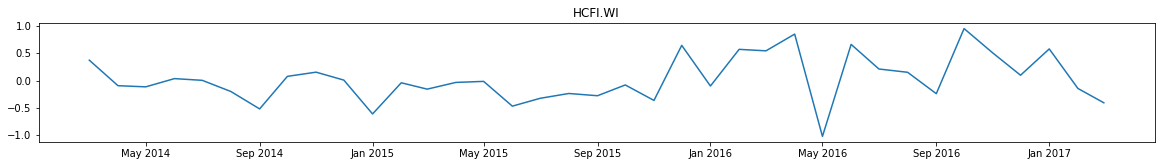

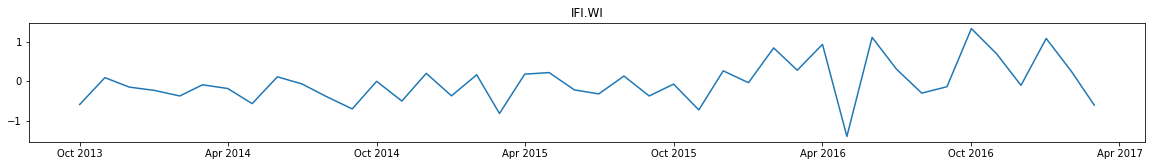

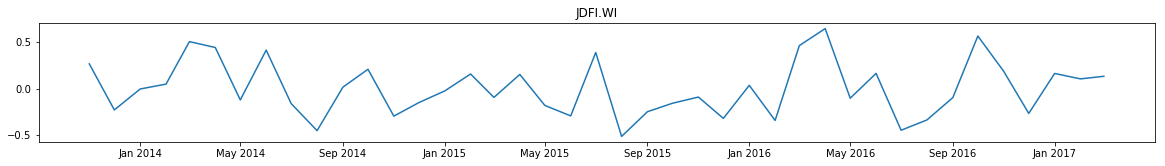

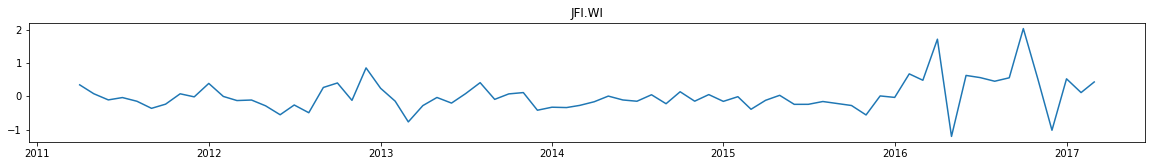

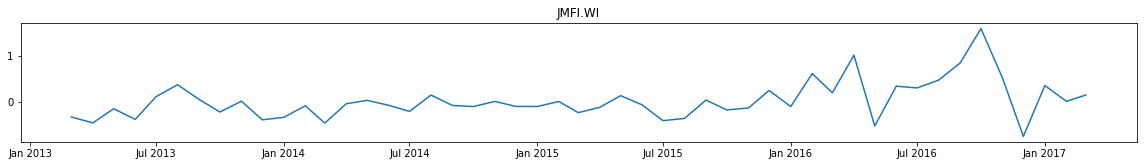

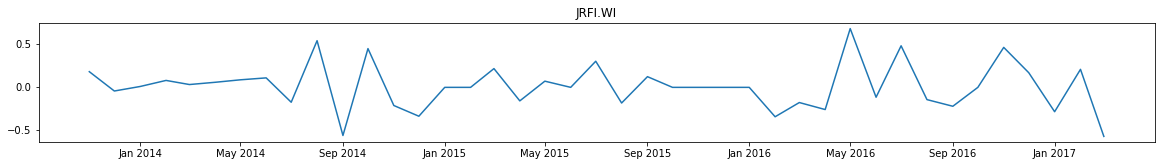

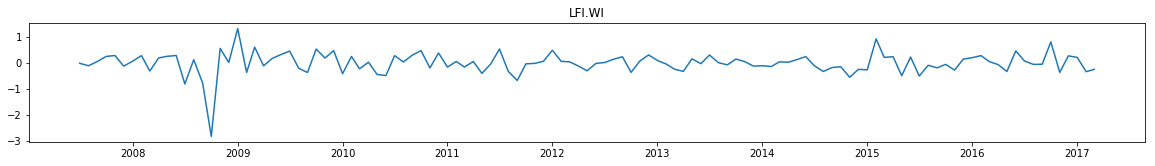

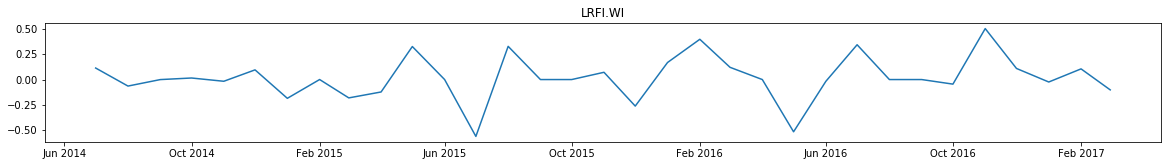

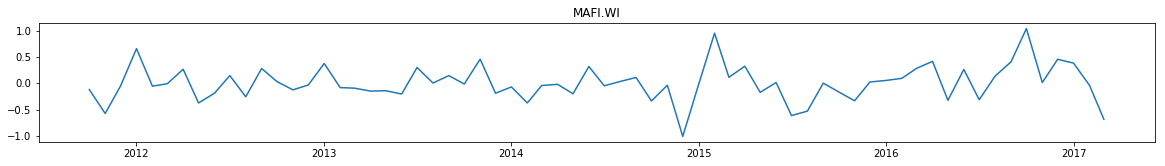

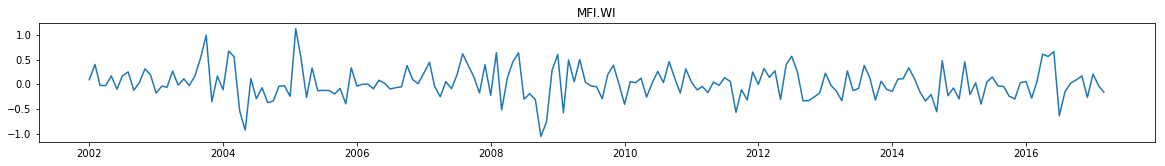

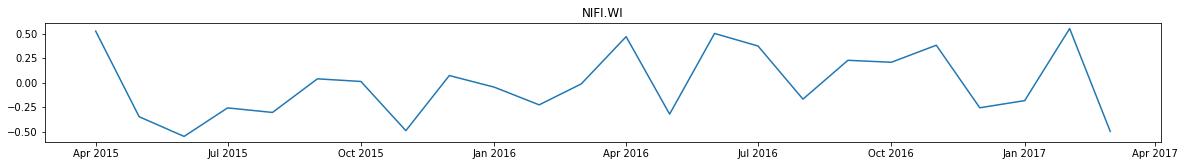

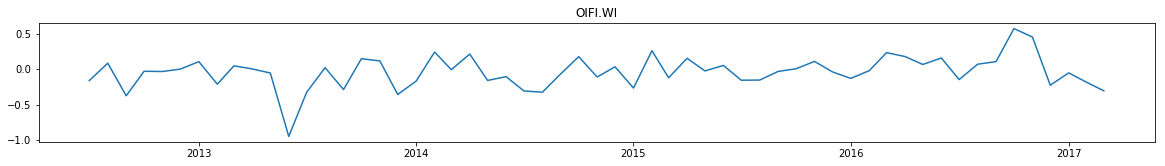

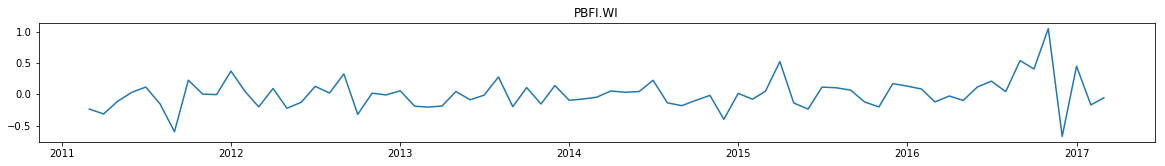

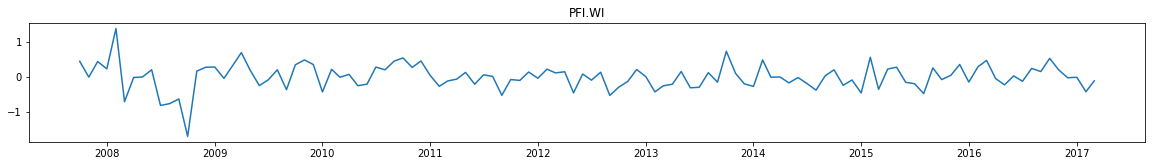

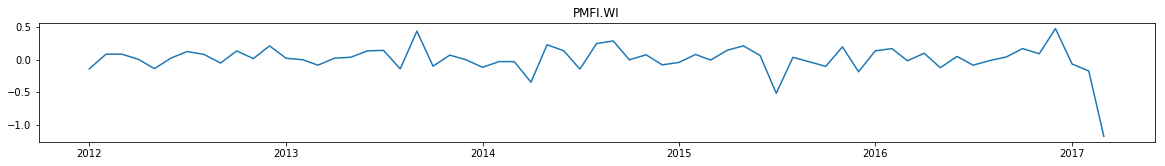

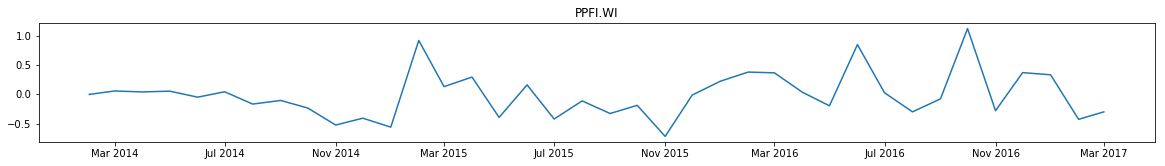

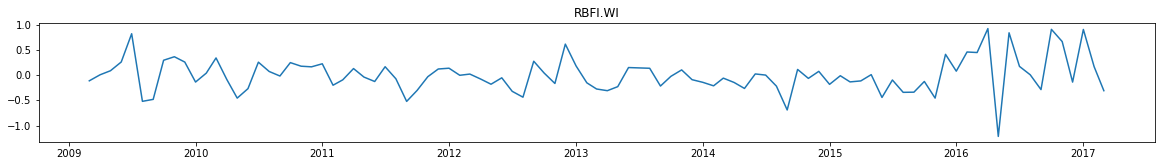

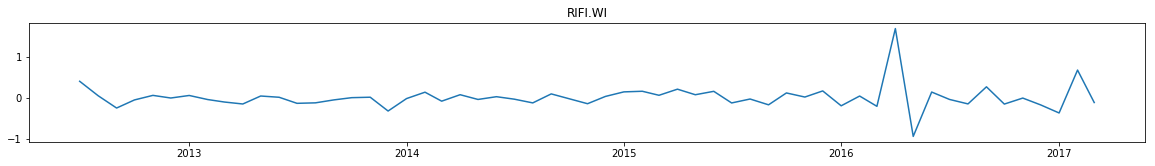

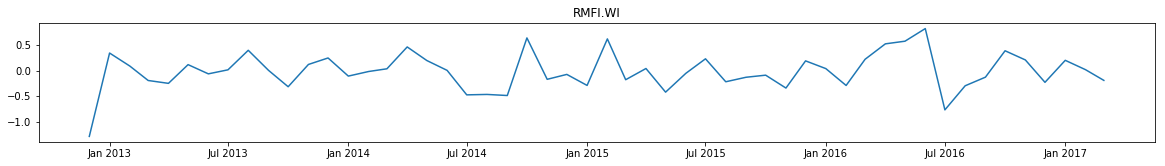

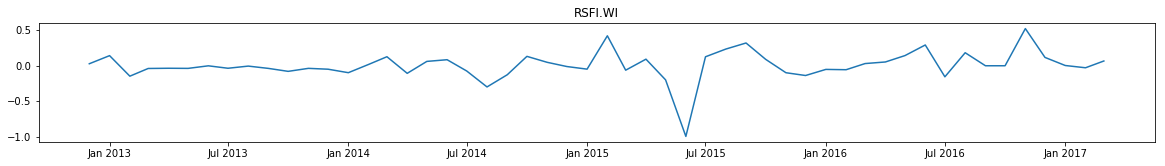

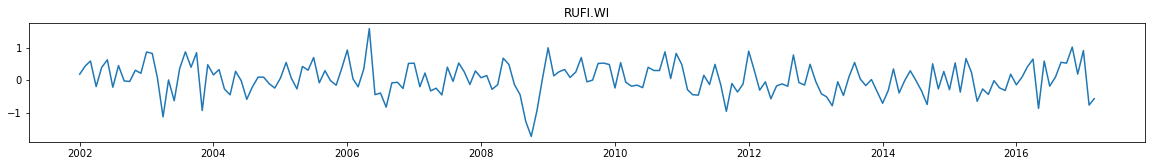

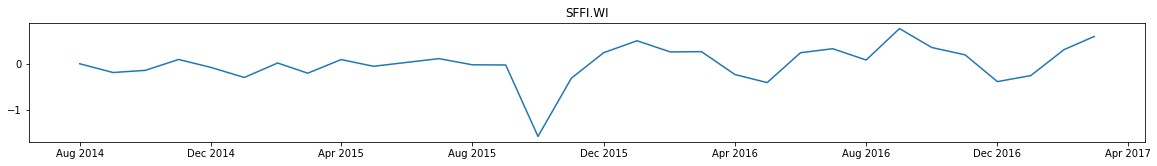

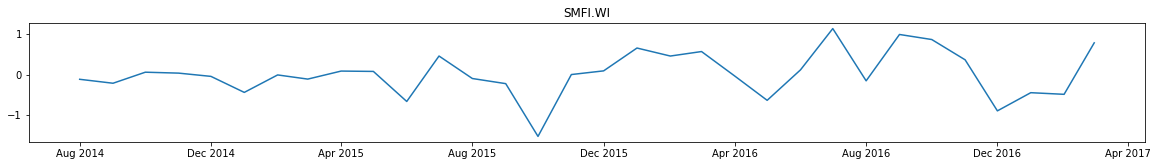

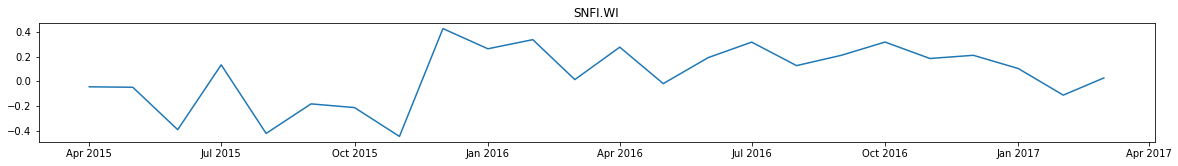

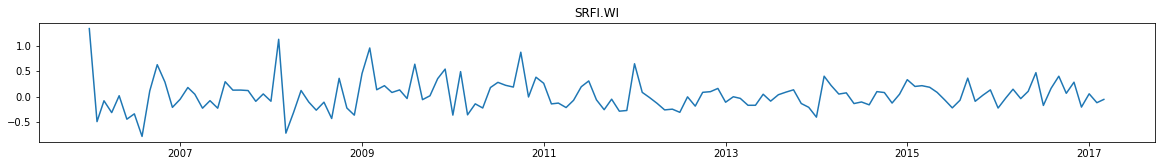

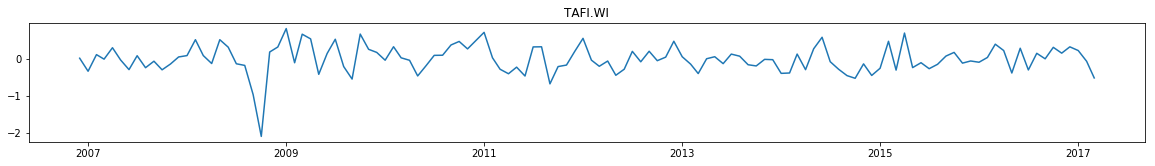

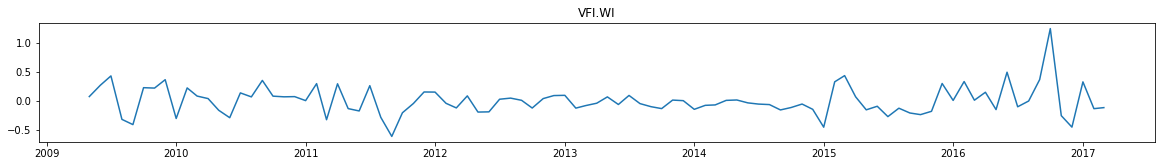

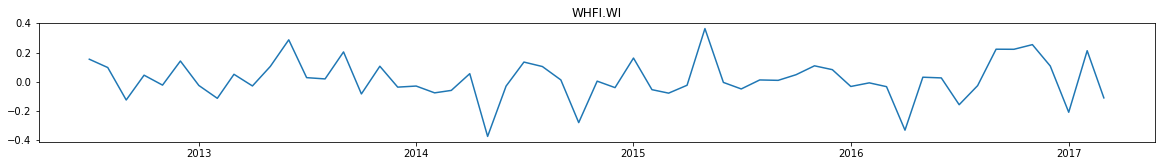

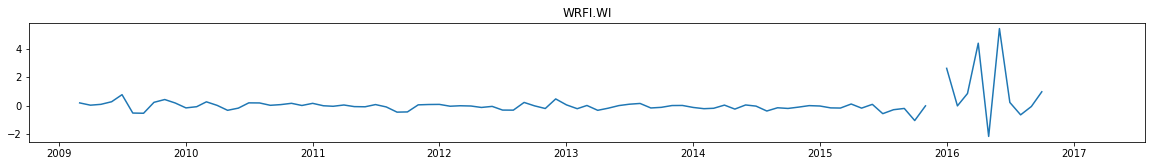

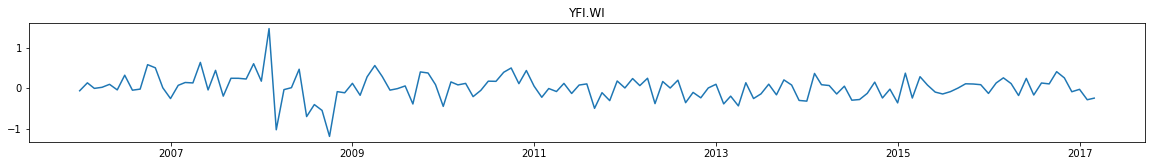

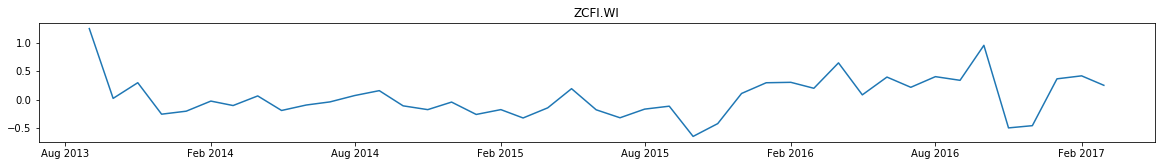

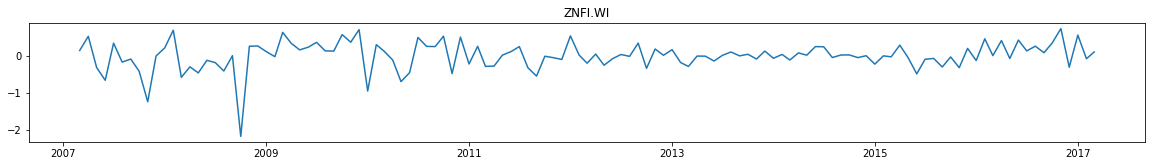

In [100]:
N=len(pd.unique(summed_df['kind']))
cnt=1
for i,j in summed_df.groupby(['kind']):
    j['time_tag']=pd.to_datetime(j['time_tag'])
    plt.figure(figsize=(20,120))
    plt.subplot(N,1,cnt)
    plt.plot(j['time_tag'],j['pct_chg'])
    plt.title('%s'%i)
    cnt+=1

In [101]:
org_df

update_date       close  pct_chg     kind    time_tag
0     2002-01-07  15192.4111   0.2527  CUFI.WI  2002-01-01
1     2002-01-08  15646.0979   2.9863  CUFI.WI  2002-01-01
2     2002-01-09  15664.8426   0.1198  CUFI.WI  2002-01-01
3     2002-01-10  15614.8037  -0.3194  CUFI.WI  2002-01-01
4     2002-01-11  15631.0736   0.1042  CUFI.WI  2002-01-01
5     2002-01-14  15638.3785   0.0467  CUFI.WI  2002-01-01
6     2002-01-15  15683.4442   0.2882  CUFI.WI  2002-01-01
7     2002-01-16  15604.0448  -0.5063  CUFI.WI  2002-01-01
8     2002-01-17  15693.0333   0.5703  CUFI.WI  2002-01-01
9     2002-01-18  15618.3511  -0.4759  CUFI.WI  2002-01-01
10    2002-01-21  15522.7662  -0.6120  CUFI.WI  2002-01-01
11    2002-01-22  15594.8623   0.4645  CUFI.WI  2002-01-01
12    2002-01-23  15598.4328   0.0229  CUFI.WI  2002-01-01
13    2002-01-24  15781.0488   1.1707  CUFI.WI  2002-01-01
14    2002-01-25  15819.4862   0.2436  CUFI.WI  2002-01-01
15    2002-01-28  15623.9702  -1.2359  CUFI.WI  2002-01-01
16    2002-01-29  15592.5780  -0.2009  CUFI.WI  2002-01-01
17    2002-01-30  15574.5017  -0.1159  CUFI.WI  2002-01-01
18    2002-01-31  15642.9697   0.4396  CUFI.WI  2002-01-01
19    2002-02-01  15938.1394   1.8869  CUFI.WI  2002-02-01
20    2002-02-04  15919.0215  -0.1200  CUFI.WI  2002-02-01
21    2002-02-05  15943.7617   0.1554  CUFI.WI  2002-02-01
22    2002-02-06  15926.9516  -0.1054  CUFI.WI  2002-02-01
23    2002-02-07  15932.8962   0.0373  CUFI.WI  2002-02-01
24    2002-02-08  15930.1745  -0.0171  CUFI.WI  2002-02-01
25    2002-02-25  15679.9196  -1.5709  CUFI.WI  2002-02-01
26    2002-02-26  15679.1652  -0.0048  CUFI.WI  2002-02-01
27    2002-02-27  15663.1533  -0.1021  CUFI.WI  2002-02-01
28    2002-02-28  15681.1214   0.1147  CUFI.WI  2002-02-01
29    2002-03-01  15623.6907  -0.3662  CUFI.WI  2002-03-01
...          ...         ...      ...      ...         ...
3659  2017-02-13   6884.2159  -1.2590   YFI.WI  2017-02-01
3660  2017-02-14   6844.4933  -0.5770   YFI.WI  2017-02-01
3661  2017-02-15   6846.1641   0.0244   YFI.WI  2017-02-01
3662  2017-02-16   6821.9326  -0.3539   YFI.WI  2017-02-01
3663  2017-02-17   6719.1544  -1.5066   YFI.WI  2017-02-01
3664  2017-02-20   6726.5952   0.1107   YFI.WI  2017-02-01
3665  2017-02-21   6702.1158  -0.3639   YFI.WI  2017-02-01
3666  2017-02-22   6683.6978  -0.2748   YFI.WI  2017-02-01
3667  2017-02-23   6615.5252  -1.0200   YFI.WI  2017-02-01
3668  2017-02-24   6622.9831   0.1127   YFI.WI  2017-02-01
3669  2017-02-27   6616.0780  -0.1043   YFI.WI  2017-02-01
3670  2017-02-28   6609.3246  -0.1021   YFI.WI  2017-02-01
3671  2017-03-01   6701.6855   1.3974   YFI.WI  2017-03-01
3672  2017-03-02   6746.0446   0.6619   YFI.WI  2017-03-01
3673  2017-03-03   6736.6664  -0.1390   YFI.WI  2017-03-01
3674  2017-03-06   6747.4339   0.1598   YFI.WI  2017-03-01
3675  2017-03-07   6653.8755  -1.3866   YFI.WI  2017-03-01
3676  2017-03-08   6602.2296  -0.7762   YFI.WI  2017-03-01
3677  2017-03-09   6601.1115  -0.0169   YFI.WI  2017-03-01
3678  2017-03-10   6483.8284  -1.7767   YFI.WI  2017-03-01
3679  2017-03-13   6508.2044   0.3760   YFI.WI  2017-03-01
3680  2017-03-14   6430.4602  -1.1946   YFI.WI  2017-03-01
3681  2017-03-15   6436.1440   0.0884   YFI.WI  2017-03-01
3682  2017-03-16   6415.3158  -0.3236   YFI.WI  2017-03-01
3683  2017-03-17   6440.2030   0.3879   YFI.WI  2017-03-01
3684  2017-03-20   6482.7490   0.6606   YFI.WI  2017-03-01
3685  2017-03-21   6458.5038  -0.3740   YFI.WI  2017-03-01
3686  2017-03-22   6444.0722  -0.2235   YFI.WI  2017-03-01
3687  2017-03-23   6363.9768  -1.2429   YFI.WI  2017-03-01
3688  2017-03-24   6324.6179  -0.6185   YFI.WI  2017-03-01

[169694 rows x 5 columns]

In [102]:
summed_df=summed_df.rename(columns={'pct_chg':'pct_chg_month'})

In [103]:
org_df=pd.merge(org_df,summed_df,on=['kind','time_tag'],how='inner')

In [104]:
org_df['acc']=map(lambda x,y: 1 if np.sign(x)==np.sign(y) else 0,org_df['pct_chg'],org_df['pct_chg_month'])

In [110]:
summed_df['time_tag']=pd.to_datetime(summed_df['time_tag'])
summed_df['month']=summed_df['time_tag'].apply(lambda x: x.month)

In [114]:
summed_df_mean=pd.DataFrame(summed_df.groupby(['kind','month']).pct_chg_month.mean())

In [117]:
summed_df_mean.reset_index(inplace=True)

In [119]:
trans_df=[]
for i,j in summed_df_mean.groupby(['kind']):
    tmp=[i]
    tmp.extend(list(j['pct_chg_month']))
    trans_df.append(tmp)

In [140]:
table_1=pd.DataFrame(trans_df,columns=['kind','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12'])

In [128]:
summed_df_mean=summed_df_mean.rename(columns={'pct_chg_month':'pct_chg_mean'})

In [129]:
summed_df_mean_2=pd.merge(summed_df,summed_df_mean,on=['kind','month'],how='inner')

In [152]:
acc_total_df=[]
for i,j in summed_df_mean_2.groupby(['kind','month']):
    j=j.dropna(subset=['pct_chg_month'],axis=0)
    j['acc']=map(lambda x,y: 1 if np.sign(x)==np.sign(y) else 0,j['pct_chg_month'],j['pct_chg_mean'])
    acc=np.sum(j['acc'])/float(len(j))
    tmp=[i[0],i[1],acc]
    acc_total_df.append(tmp)

/Users/liyuefan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [153]:
acc_total_df=pd.DataFrame(acc_total_df,columns=['kind','month','acc'])

In [154]:
trans_acc_df=[]
for i,j in acc_total_df.groupby(['kind']):
    tmp=[i]
    tmp.extend(list(j['acc']))
    trans_acc_df.append(tmp)

In [155]:
table_2=pd.DataFrame(trans_acc_df,columns=['kind','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12'])

In [144]:
table_1.to_csv('monthly_mean_return.csv',index=False)

In [157]:
table_2.to_csv('monthly_return_acc.csv',index=False)